In [1]:
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u

from gw_signal_tools import latexparams
from gw_signal_tools.waveform import get_wf_generator, WaveformDerivative

/Users/maxmelching/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


The pyseobnr package has failed to load, you will not be able to employ SEOBNRv5 approximants.


In [ ]:
import lalsimulation.gwsignal.core.parameter_conventions as pc

# -- Make sure mass1 and mass2 are not in default_dict
pc.default_dict.pop('mass1', None)
pc.default_dict.pop('mass2', None)

In [2]:
from gw_signal_tools import PLOT_STYLE_SHEET

plt.style.use(PLOT_STYLE_SHEET)

In [ ]:
f_min = 20.0 * u.Hz
f_max = 1024.0 * u.Hz

wf_params = {
    # 'total_mass': 100.*u.solMass,
    # 'total_mass': 50.*u.solMass,
    # 'chirp_mass': 50.*u.solMass,
    'chirp_mass': 30.0 * u.solMass,
    'mass_ratio': 0.42 * u.dimensionless_unscaled,
    'deltaT': 1.0 / 2048.0 * u.s,
    'f22_start': f_min,
    # 'deltaF': 2**-10*u.Hz,
    'deltaF': 2**-8 * u.Hz,
    'f_max': f_max,
    'f22_ref': 20.0 * u.Hz,
    'phi_ref': 0.0 * u.rad,
    # 'distance': 1.*u.Mpc,
    'distance': 440.0 * u.Mpc,
    'inclination': 0.0 * u.rad,
    'eccentricity': 0.0 * u.dimensionless_unscaled,
    'longAscNodes': 0.0 * u.rad,
    'meanPerAno': 0.0 * u.rad,
    # 'spin1z': 0.42*u.dimensionless_unscaled,
    'condition': 0,
}


# Define the approximant
approximant = 'IMRPhenomXPHM'
# approximant = 'SEOBNRv4'

# Initialize the generator
wf_generator = get_wf_generator(approximant)

/Users/maxmelching/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/lalsimulation/gwsignal/core/waveform.py:226: UserWarning: This code is currently UNREVIEWED, use with caution!
  warnings.warn("This code is currently UNREVIEWED, use with caution!")


# Derivative Testing

The purpose of this notebook is to provide proof (well, at least evidence) that the derivative calculations conducted by ``WaveformDerivative`` work well.

In [8]:
# param_to_vary = 'total_mass'
param_to_vary = 'chirp_mass'
# param_to_vary = 'sym_mass_ratio'
# param_to_vary = 'mass_ratio'
# param_to_vary = 'distance'
# param_to_vary = 'spin1z'

* total_mass: very good agreement, 1e-6 relative difference for lower frequencies and not more than 1e-3 overall -> gets worse, 1e-2 for larger frequencies; is perhaps due to large influence of total mass on phase; this is what it looks like for 100 Msun, for 50 Msun things are one to two orders of magnitude below these numbers
* chirp_mass: agreement is good, relative error of around 1e-3 until values get close to zero
* sym_mass_ratio: not perfect for 0.05, but this is very challenging territory
* mass_ratio: pretty good, relative differences are never larger than 1e-4 until $\approx 60 Hz$; larger for higher frequencies, but numdifftools error increases there drastically as well, which means this might not come from our implementation
* distance: really good for mass ratio 0.42 (1e-9 relative error), but for 0.5 it is not good, phases seem to differ quite a bit

In [ ]:
deriv_gw_signal = WaveformDerivative(
    wf_params,
    param_to_vary,
    wf_generator,
    convergence_check='diff_norm',
    # convergence_threshold=0.005,
    # convergence_threshold=0.0001,  # Testing if relative difference becomes smaller when doing this -> yes it does; but computation time also increases significantly
    # start_step_size=1e-3,
    # start_step_size=1e-8,  # For fun
    deriv_routine='gw_signal_tools',
    pass_inn_prod_kwargs_to_deriv=True,
)

num_deriv_gw_signal, info_dict_gw_signal = deriv_gw_signal(), deriv_gw_signal.deriv_info

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is

In [10]:
info_dict_gw_signal

{'norm_squared': <Quantity 9.13605236e-43 1 / solMass2>,
 'final_step_size': np.float64(0.0005),
 'final_convergence_val': <Quantity 0.00018874>,
 'number_of_refinements': 0,
 'final_set_of_step_sizes': array([1.e-02, 5.e-03, 1.e-03, 5.e-04, 1.e-04, 5.e-05, 1.e-05,
        5.e-06, 1.e-06]),
 'deriv_formula': 'five_point'}

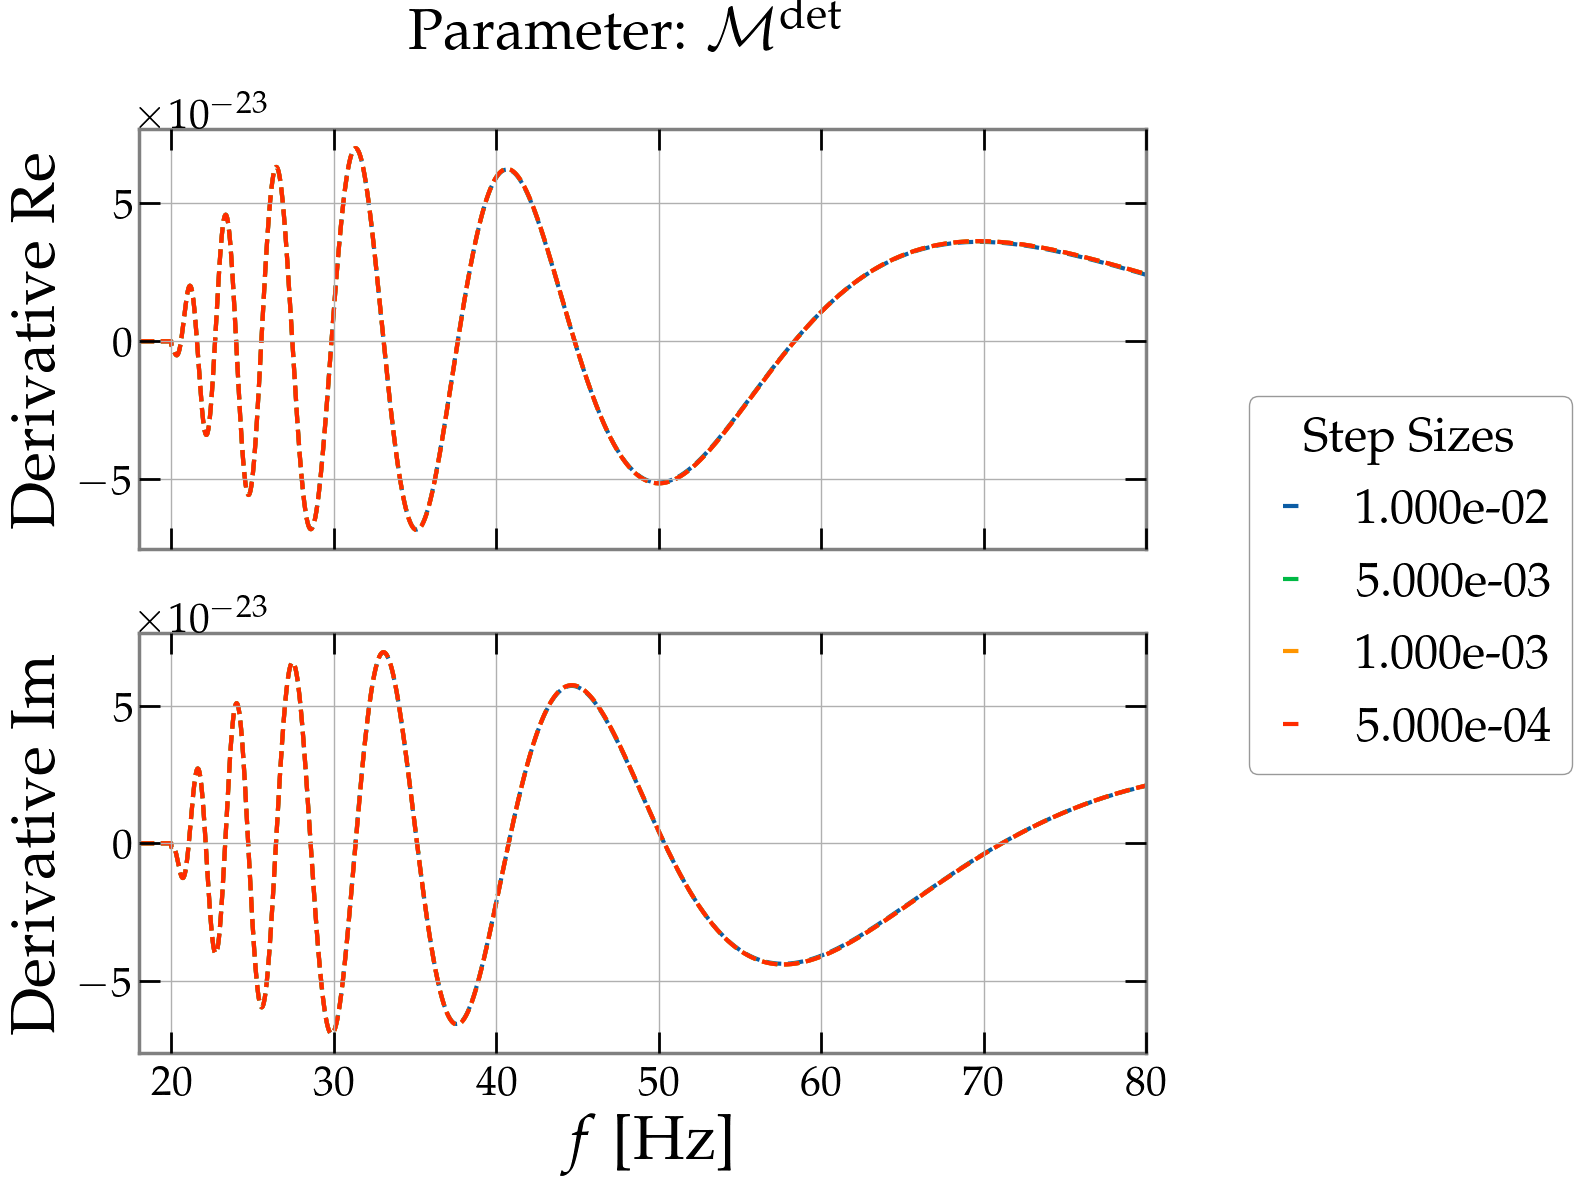

In [11]:
ax = deriv_gw_signal.convergence_plot()

plt.xlim([18, 80])

plt.show()

Convergence/stability is demonstrated here very well

In [12]:
deriv_nd_tools = WaveformDerivative(
    wf_params, param_to_vary, wf_generator, deriv_routine='numdifftools'
)

num_deriv_nd_tools, info_dict_nd_tools = deriv_nd_tools(), deriv_nd_tools.deriv_info

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is

In [13]:
info_dict_nd_tools

{'f_value': <FrequencySeries([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j,
                   0.+0.j]
                  unit=Unit("s strain"),
                  f0=<Quantity 0. Hz>,
                  df=<Quantity 0.00390625 Hz>,
                  epoch=None,
                  name='hplus',
                  channel=None)>,
 'error_estimate': <FrequencySeries([0., 0., 0., ..., 0., 0., 0.]
                  unit=Unit("s strain / solMass"),
                  f0=<Quantity 0. Hz>,
                  df=<Quantity 0.00390625 Hz>,
                  epoch=None,
                  name=None,
                  channel=None)>,
 'final_step': array([0.00810209, 0.00810209, 0.00810209, ..., 0.00810209,
        0.00810209, 0.00810209], shape=(262145,)),
 'index': array([1310725, 1310726, 1310727, ..., 1572867, 1572868,
        1572869], shape=(262145,))}

Problem: fairly frequently, bounds of allowed parameter ranges are reached

In [14]:
deriv_nd_tools_2 = WaveformDerivative(
    wf_params, param_to_vary, wf_generator, deriv_routine='amplitude_phase'
)

num_deriv_nd_tools_2, info_dict_nd_tools_2 = (
    deriv_nd_tools_2(),
    deriv_nd_tools_2.deriv_info,
)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is

In [15]:
info_dict_nd_tools_2

{'abs': {'f_value': array([0., 0., 0., ..., 0., 0., 0.], shape=(262145,)),
  'error_estimate': array([0., 0., 0., ..., 0., 0., 0.], shape=(262145,)),
  'final_step': array([0.00810209, 0.00810209, 0.00810209, ..., 0.00810209,
         0.00810209, 0.00810209], shape=(262145,)),
  'index': array([1310725, 1310726, 1310727, ..., 1572867, 1572868,
         1572869], shape=(262145,))},
 'phase': {'f_value': array([ 0.        ,  0.        ,  0.        , ..., 25.13274123,
         25.13274123, 25.13274123], shape=(262145,)),
  'error_estimate': array([0., 0., 0., ..., 0., 0., 0.], shape=(262145,)),
  'final_step': array([0.00810209, 0.00810209, 0.00810209, ..., 0.00405105,
         0.00405105, 0.00405105], shape=(262145,)),
  'index': array([1310725, 1310726, 1310727, ..., 1835012, 1835013,
         1835014], shape=(262145,))}}

/Users/maxmelching/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/astropy/units/quantity.py:653: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/maxmelching/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/astropy/units/quantity.py:653: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


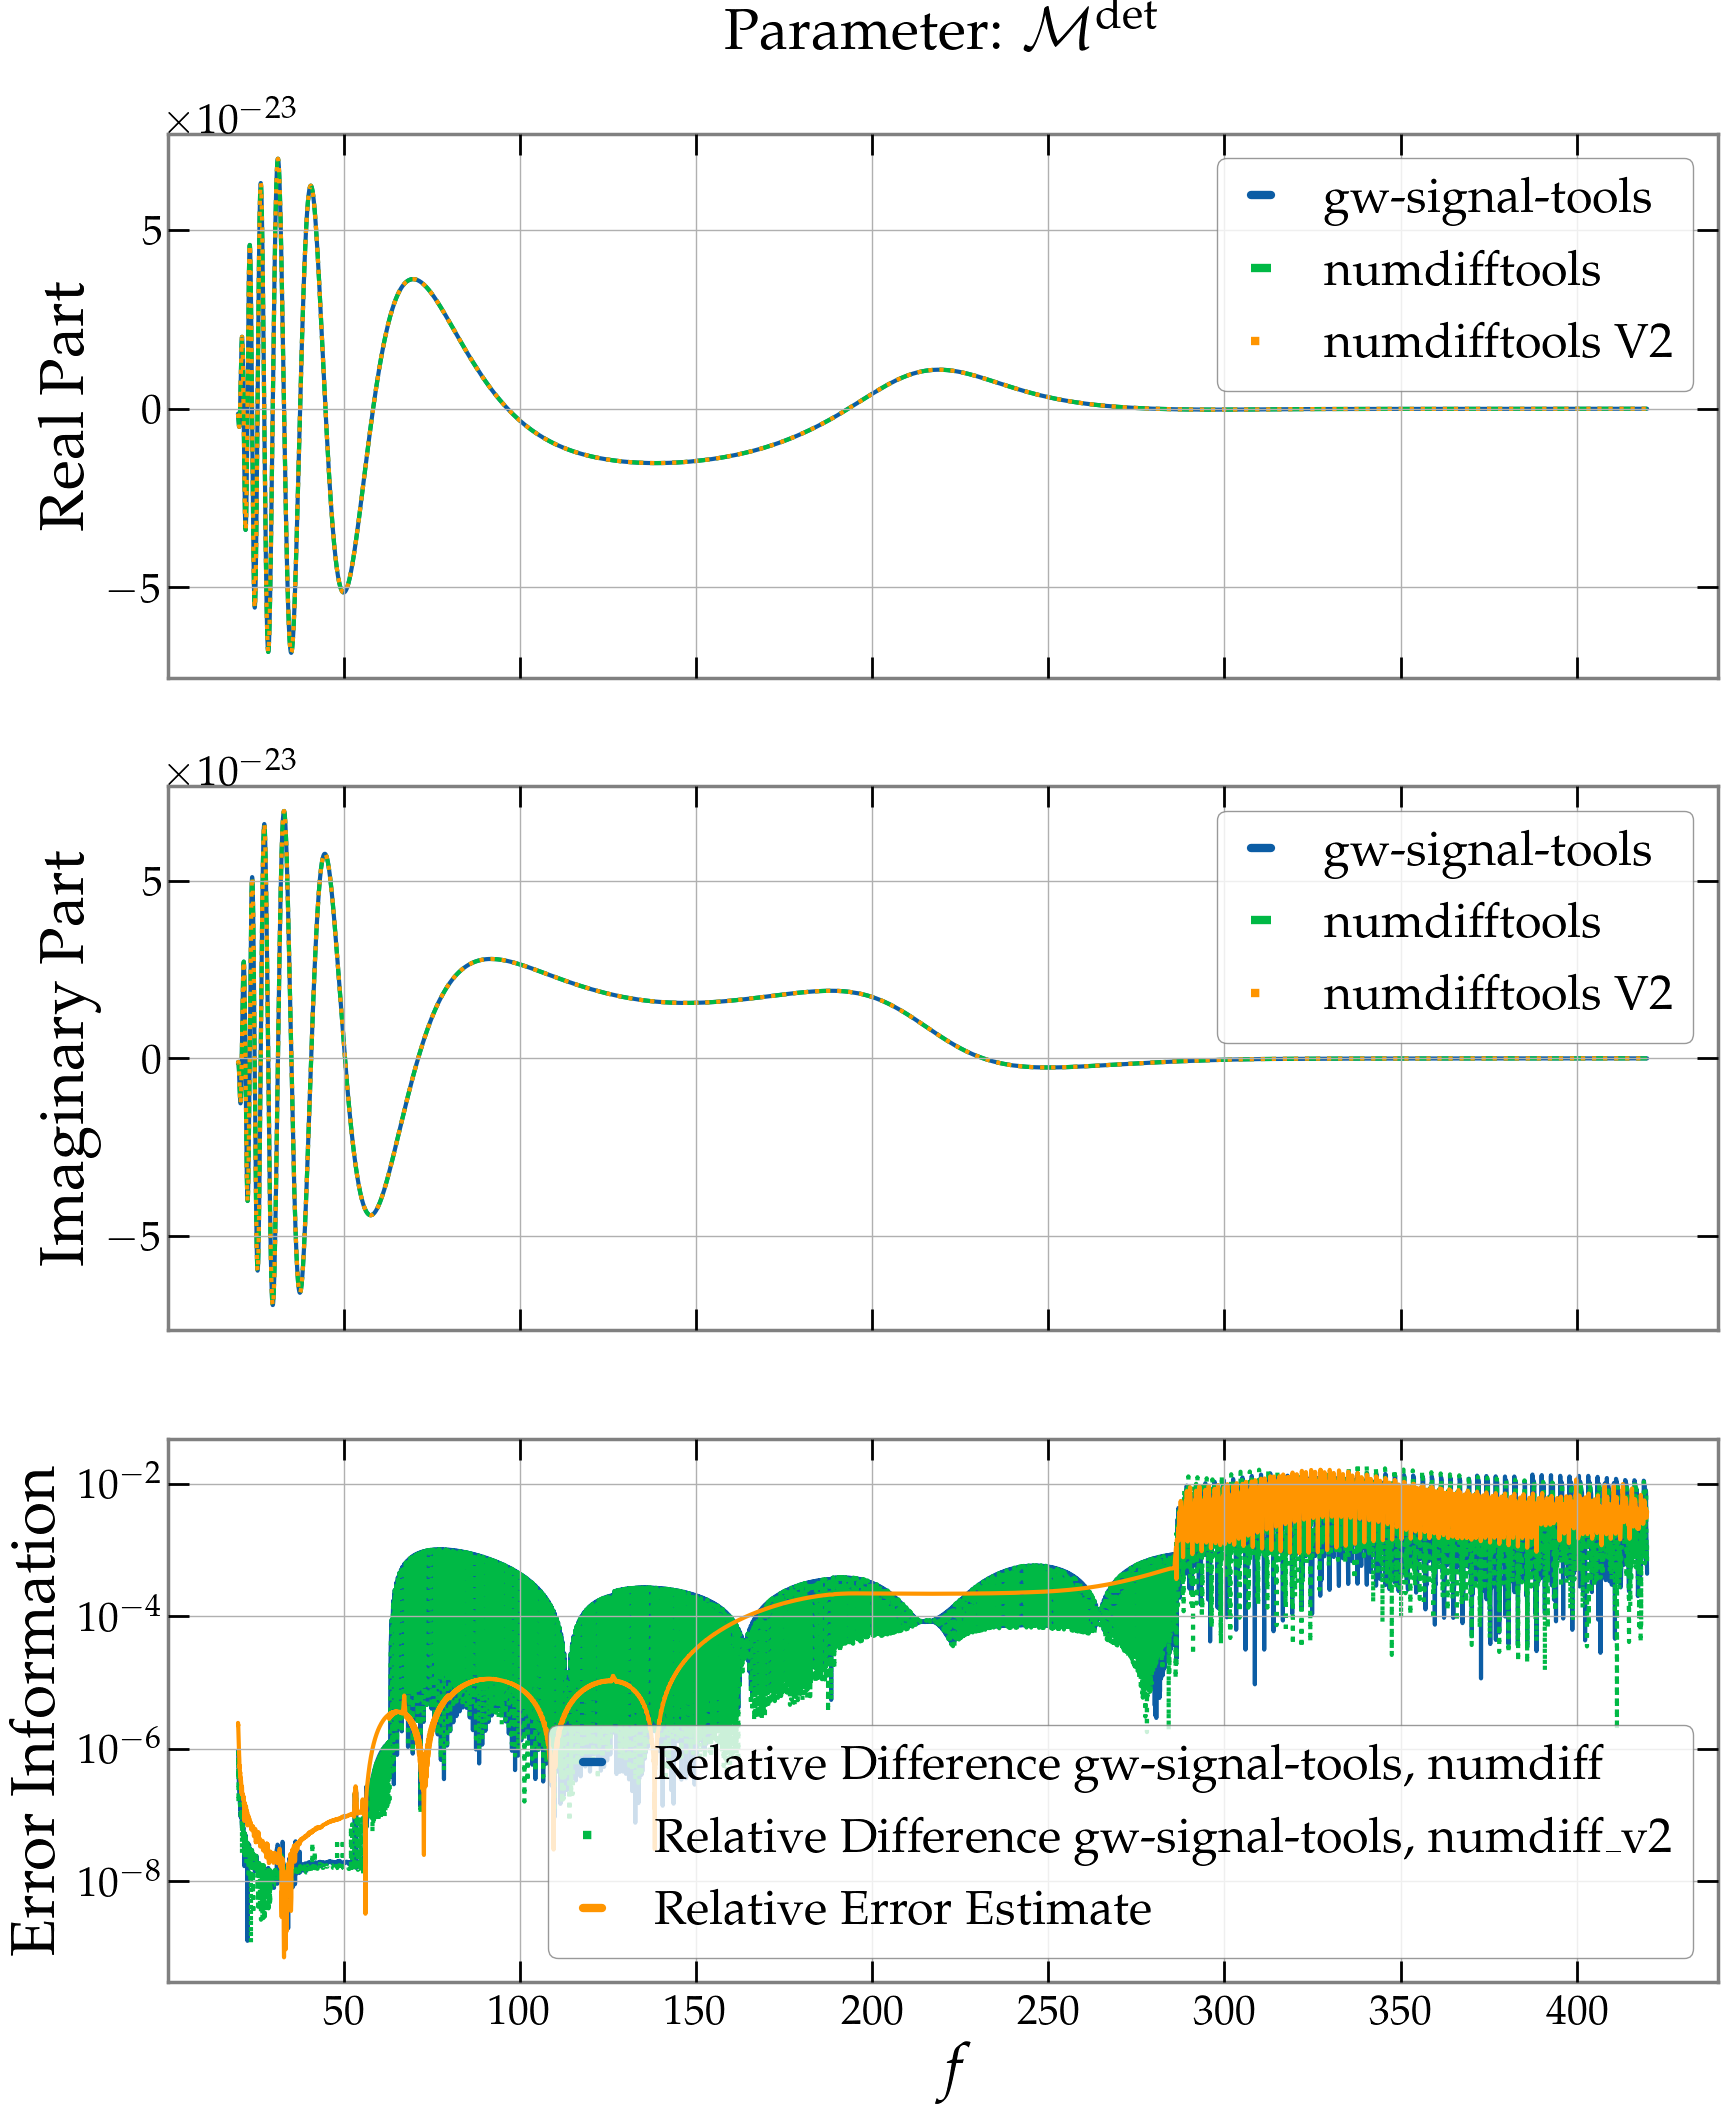

In [16]:
# f_range=[f_min, f_max]
# f_range=[f_min, 60. * u.Hz]
# f_range=[f_min, 200. * u.Hz]
f_range = [f_min, 420.0 * u.Hz]


fig, ax = plt.subplots(figsize=(20, 24), nrows=3, sharex=True)

ax[0,].plot(
    num_deriv_gw_signal.crop(start=f_range[0], end=f_range[1]).real,
    label='gw-signal-tools',
)
ax[0,].plot(
    num_deriv_nd_tools.crop(start=f_range[0], end=f_range[1]).real,
    '--',
    label='numdifftools',
)
ax[0,].plot(
    num_deriv_nd_tools_2.crop(start=f_range[0], end=f_range[1]).real,
    ':',
    label='numdifftools V2',
)


ax[1,].plot(
    num_deriv_gw_signal.crop(start=f_range[0], end=f_range[1]).imag,
    label='gw-signal-tools',
)
ax[1,].plot(
    num_deriv_nd_tools.crop(start=f_range[0], end=f_range[1]).imag,
    '--',
    label='numdifftools',
)
ax[1,].plot(
    num_deriv_nd_tools_2.crop(start=f_range[0], end=f_range[1]).imag,
    ':',
    label='numdifftools V2',
)


ax[2,].plot(
    ((num_deriv_gw_signal - num_deriv_nd_tools) / num_deriv_nd_tools)
    .abs()
    .crop(start=f_range[0], end=f_range[1]),
    label='Relative Difference gw-signal-tools, numdiff',
)
ax[2,].plot(
    ((num_deriv_gw_signal - num_deriv_nd_tools_2) / num_deriv_nd_tools_2)
    .abs()
    .crop(start=f_range[0], end=f_range[1]),
    ':',
    label='Relative Difference gw-signal-tools, numdiff_v2',
)

ax[2,].plot(
    (deriv_nd_tools.error_estimate / num_deriv_nd_tools)
    .abs()
    .crop(start=f_range[0], end=f_range[1]),
    label='Relative Error Estimate',
)


# title = param_to_vary
# title += f' ({par})' if ((par:=latexparams.get(param_to_vary, None)) is not None) else ''
# title += ' derivative'
title = f'Parameter: {latexparams.get(param_to_vary, param_to_vary)}'
# fig.suptitle(title)
ax[0,].set_title(title + '\n')

ax[0,].set_ylabel('Real Part')
ax[0,].legend()  # (ncols=3)

ax[1,].set_ylabel('Imaginary Part')
ax[1,].legend()  # (ncols=3)

ax[2,].set_xlabel('$f$')
ax[2,].set_yscale('log')
ax[2,].set_ylabel('Error Information')
ax[2,].legend()

plt.show()

Relative difference on scale of error estimate is good, right? Should mean we get equal to numdifftools result that we are on scale of its error, i.e. the deviation need not come from our own implementation

In [17]:
from gw_signal_tools.waveform import norm

In [18]:
f_range = None  # No restriction here

fisher1 = norm(num_deriv_gw_signal, f_range=f_range)
fisher2 = norm(num_deriv_nd_tools, f_range=f_range)

In [19]:
print(fisher1, fisher2, abs((fisher1 - fisher2) / fisher1))

9.558269903661992e-22 1 / solMass 9.558166668882495e-22 1 / solMass 1.080057170771298e-05


Agreement is good, only real deviations (around 1%) occur for extreme situations like very small symmetric mass ratio, otherwise usually around 1e-4 or even lower.

## Analytical Derivatives Verification

As another test of the implementation, we can utilize that certain parameters have derivatives that are known analytically.
By comparing those results with those of our numerical routine(s), we can get an idea of their accuracy (in this case a direct assessment of their accuracy, not just coming from the consistency of different routines).
Granted, the parameter impact is usually less complicated than for the other intrinsic parameters, where the analytical dependence is usually not fully known, but this is nonetheless a good test.

### Phase and Time

In [20]:
waveform = wf_generator(wf_params)
ana_deriv_time = waveform * -1j * 2.0 * np.pi * waveform.frequencies
ana_deriv_phase = waveform * 2j

deriv_phase = WaveformDerivative(wf_params, 'phi_ref', wf_generator)

num_deriv_phase, info_dict_phase = deriv_phase(), deriv_phase.deriv_info

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is

/Users/maxmelching/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/astropy/units/quantity.py:653: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


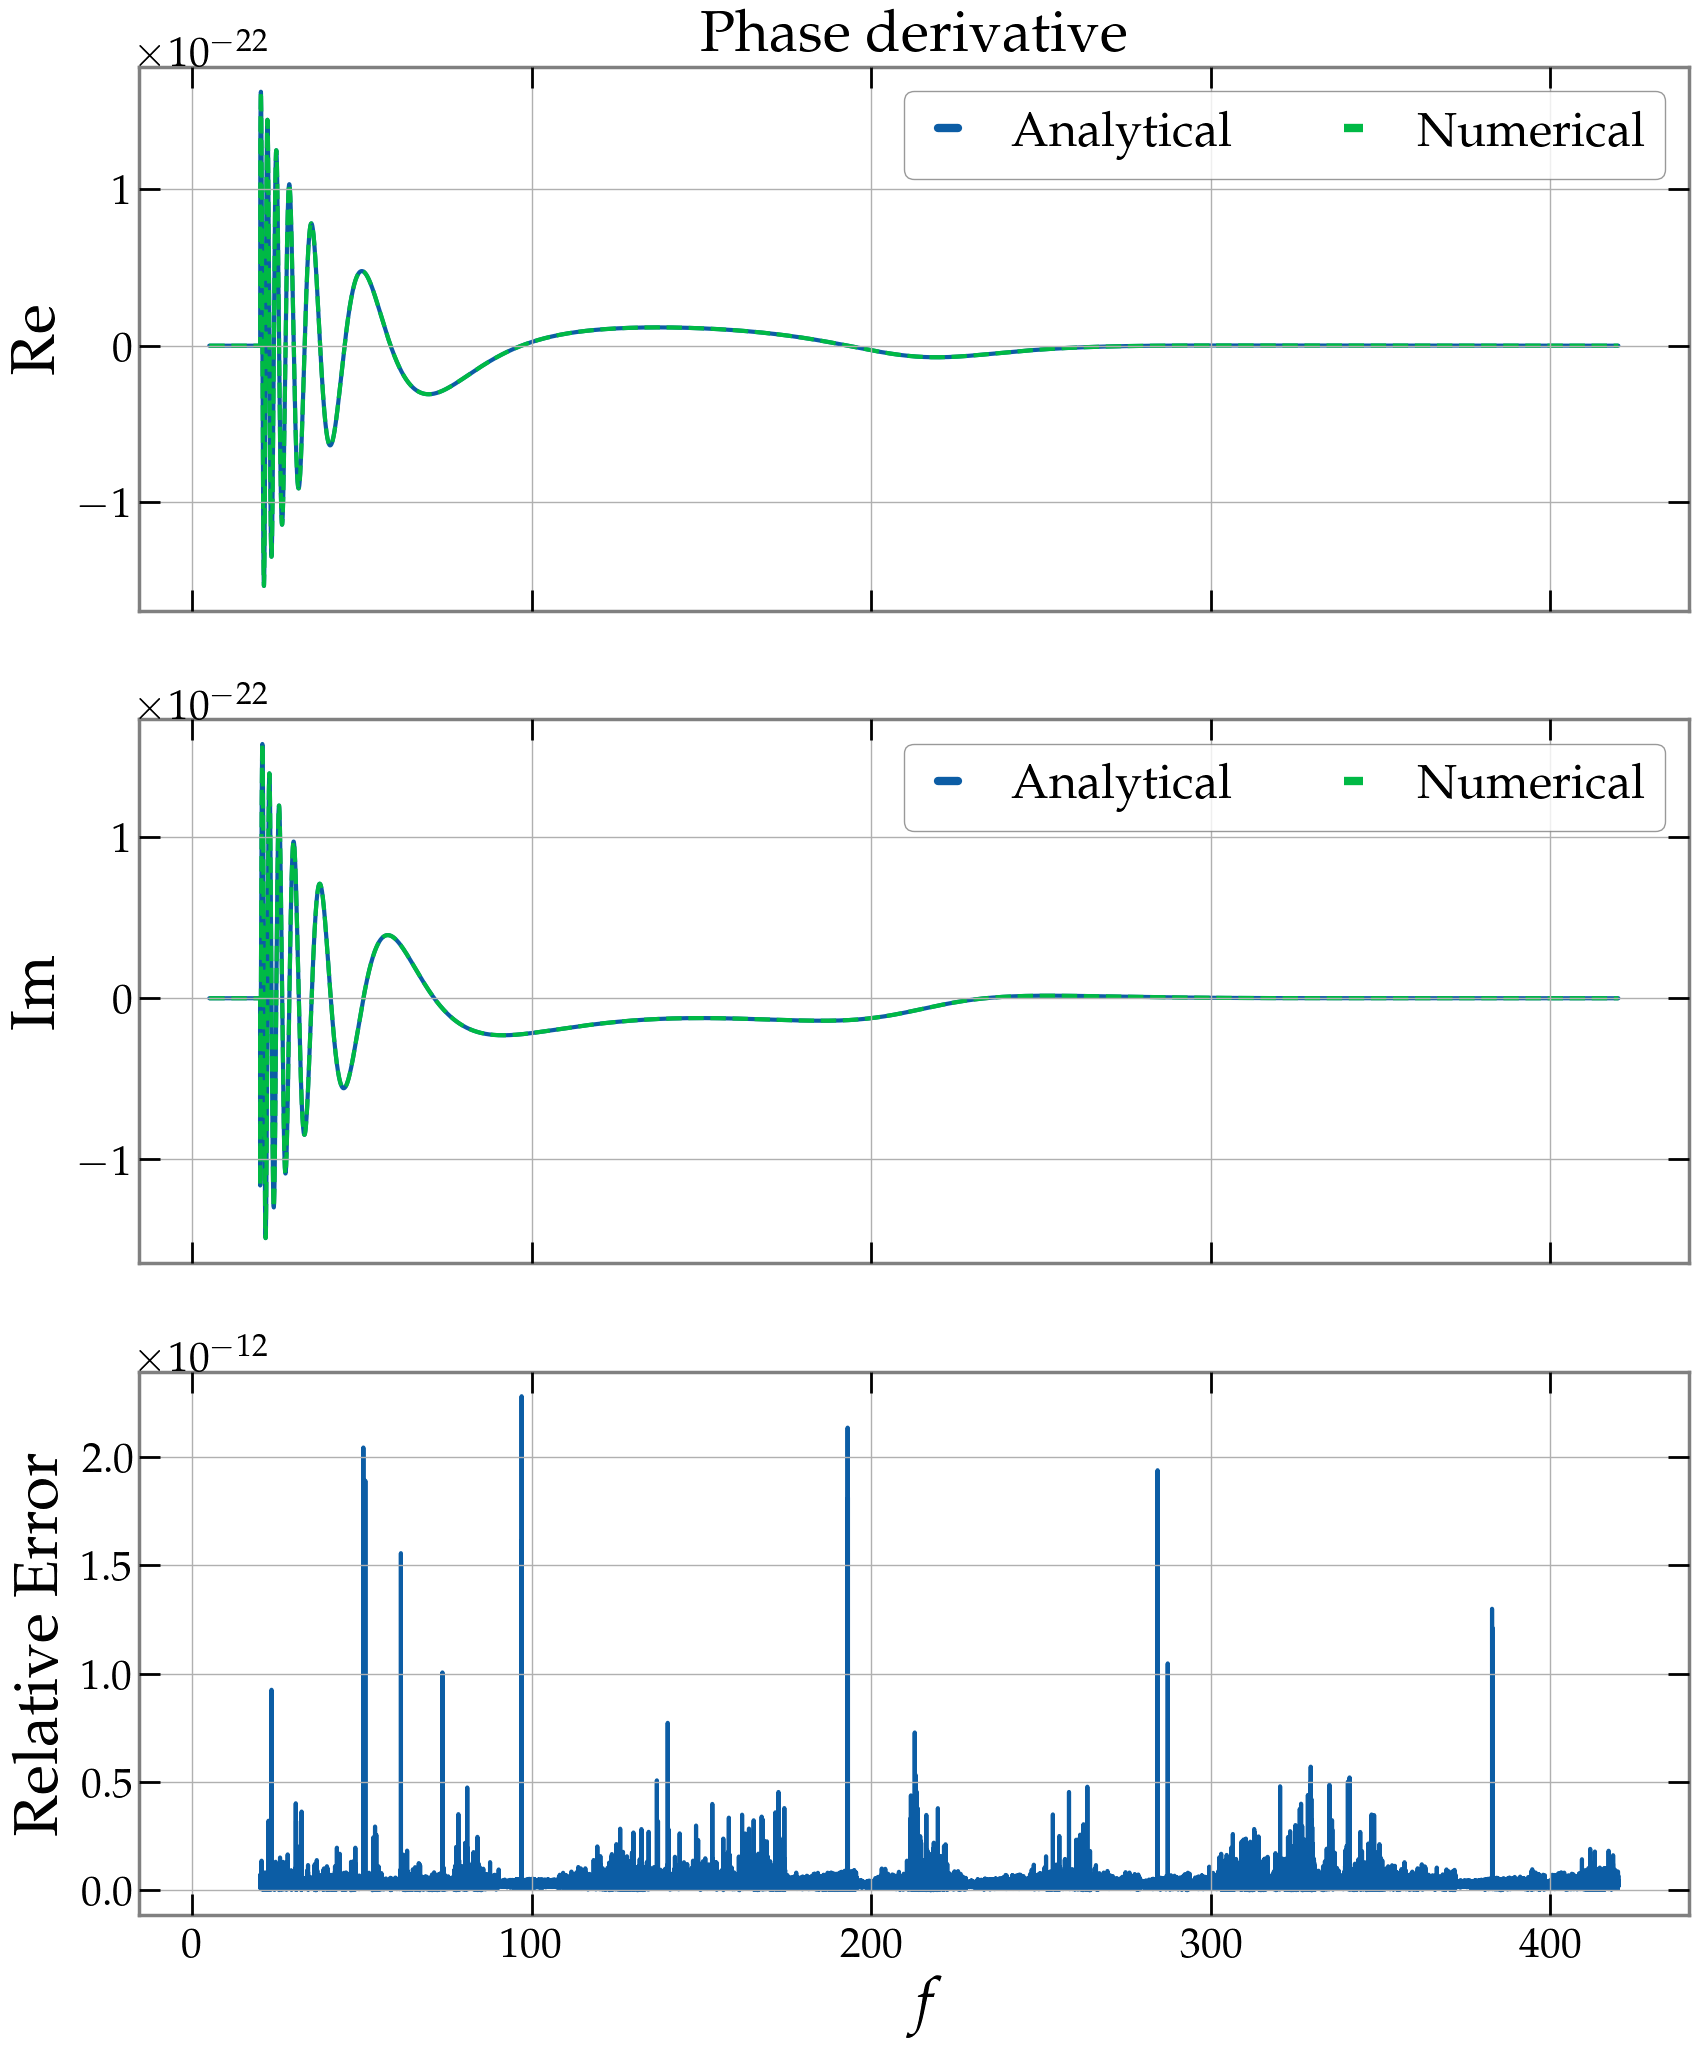

In [21]:
f_range = [5.0 * u.Hz, 420.0 * u.Hz]


fig, ax = plt.subplots(figsize=(20, 24), nrows=3, sharex=True)

ax[0].plot(
    ana_deriv_phase.crop(start=f_range[0], end=f_range[1]).real, label='Analytical'
)
ax[0].plot(
    num_deriv_phase.crop(start=f_range[0], end=f_range[1]).real, '--', label='Numerical'
)


ax[1].plot(
    ana_deriv_phase.crop(start=f_range[0], end=f_range[1]).imag, label='Analytical'
)
ax[1].plot(
    num_deriv_phase.crop(start=f_range[0], end=f_range[1]).imag, '--', label='Numerical'
)


ax[2].plot(
    ((ana_deriv_phase - num_deriv_phase) / ana_deriv_phase)
    .abs()
    .crop(start=f_range[0], end=f_range[1])
)


ax[0].legend(ncols=2)
ax[1].legend(ncols=2)
ax[0].set_title('Phase derivative')
ax[0].set_ylabel('Re')
ax[1].set_ylabel('Im')
ax[2].set_ylabel('Relative Error')
plt.xlabel('$f$')
# plt.xlim(5, 100)

plt.show()

Very good agreement. Note, however, that this might not be the case if higher harmonics have a significant impact or if the binary is precessing.

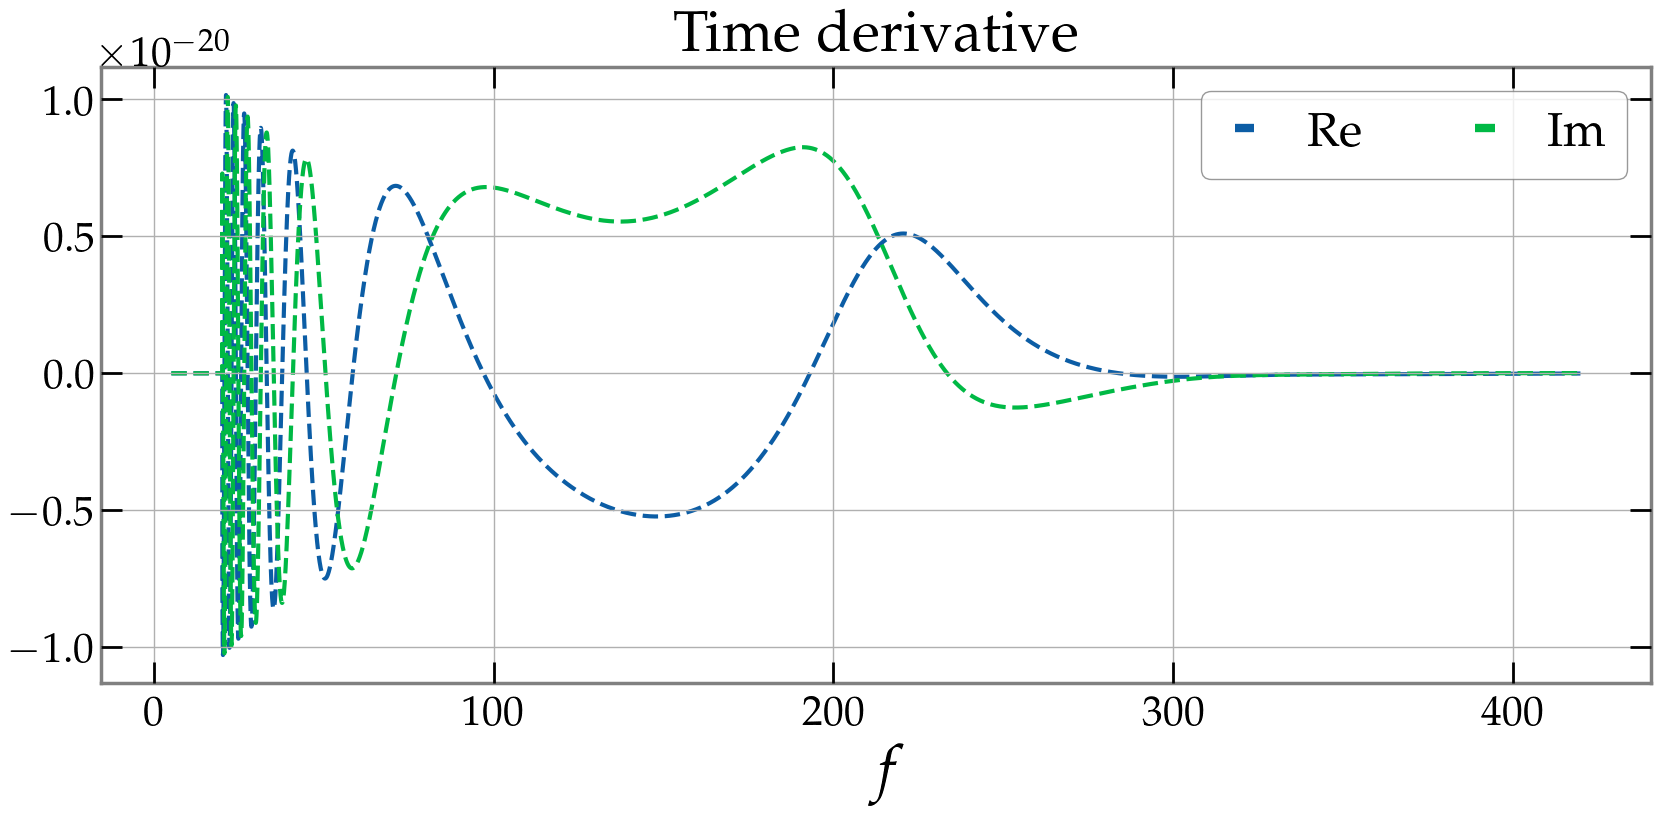

In [22]:
f_range = [5.0 * u.Hz, 420.0 * u.Hz]


fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(ana_deriv_time.crop(start=f_range[0], end=f_range[1]).real, '--', label='Re')
ax.plot(ana_deriv_time.crop(start=f_range[0], end=f_range[1]).imag, '--', label='Im')

ax.set_title('Time derivative')
ax.set_xlabel('$f$')
ax.legend(ncols=2)
# plt.xlim(5, 100)

plt.show()

### Luminosity Distance

For the distance, we can calculate a analytical derivative by noticing that

$$h(f, D_L) = h(f, 1) / D_L$$

which implies

$$\frac{\partial h(f, D_L)}{\partial D_L} = h(f, 1) \frac{\partial 1/D_L}{\partial D_L} = h(f, 1) (-1 / D_L^2) = - h(f, D_L) / D_L .$$

In [23]:
# We rename distance parameter in the new generator so that derivative
# routine does not recognize it and uses analytical derivative
def dist_deriv_gen(wf_params):
    _wf_params = wf_params.copy()
    _wf_params['distance'] = _wf_params.pop('dist')

    return wf_generator(_wf_params)


dist_deriv_params = wf_params.copy()
dist_deriv_params.pop('distance')
dist_deriv_params['dist'] = wf_params['distance']

deriv_distance = WaveformDerivative(dist_deriv_params, 'dist', dist_deriv_gen)

num_deriv_distance, info_dict_distance = deriv_distance(), deriv_distance.deriv_info

ana_deriv_distance = -wf_generator(wf_params) / wf_params['distance']

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is

/Users/maxmelching/miniconda3/envs/gw_signal_tools/lib/python3.11/site-packages/astropy/units/quantity.py:653: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


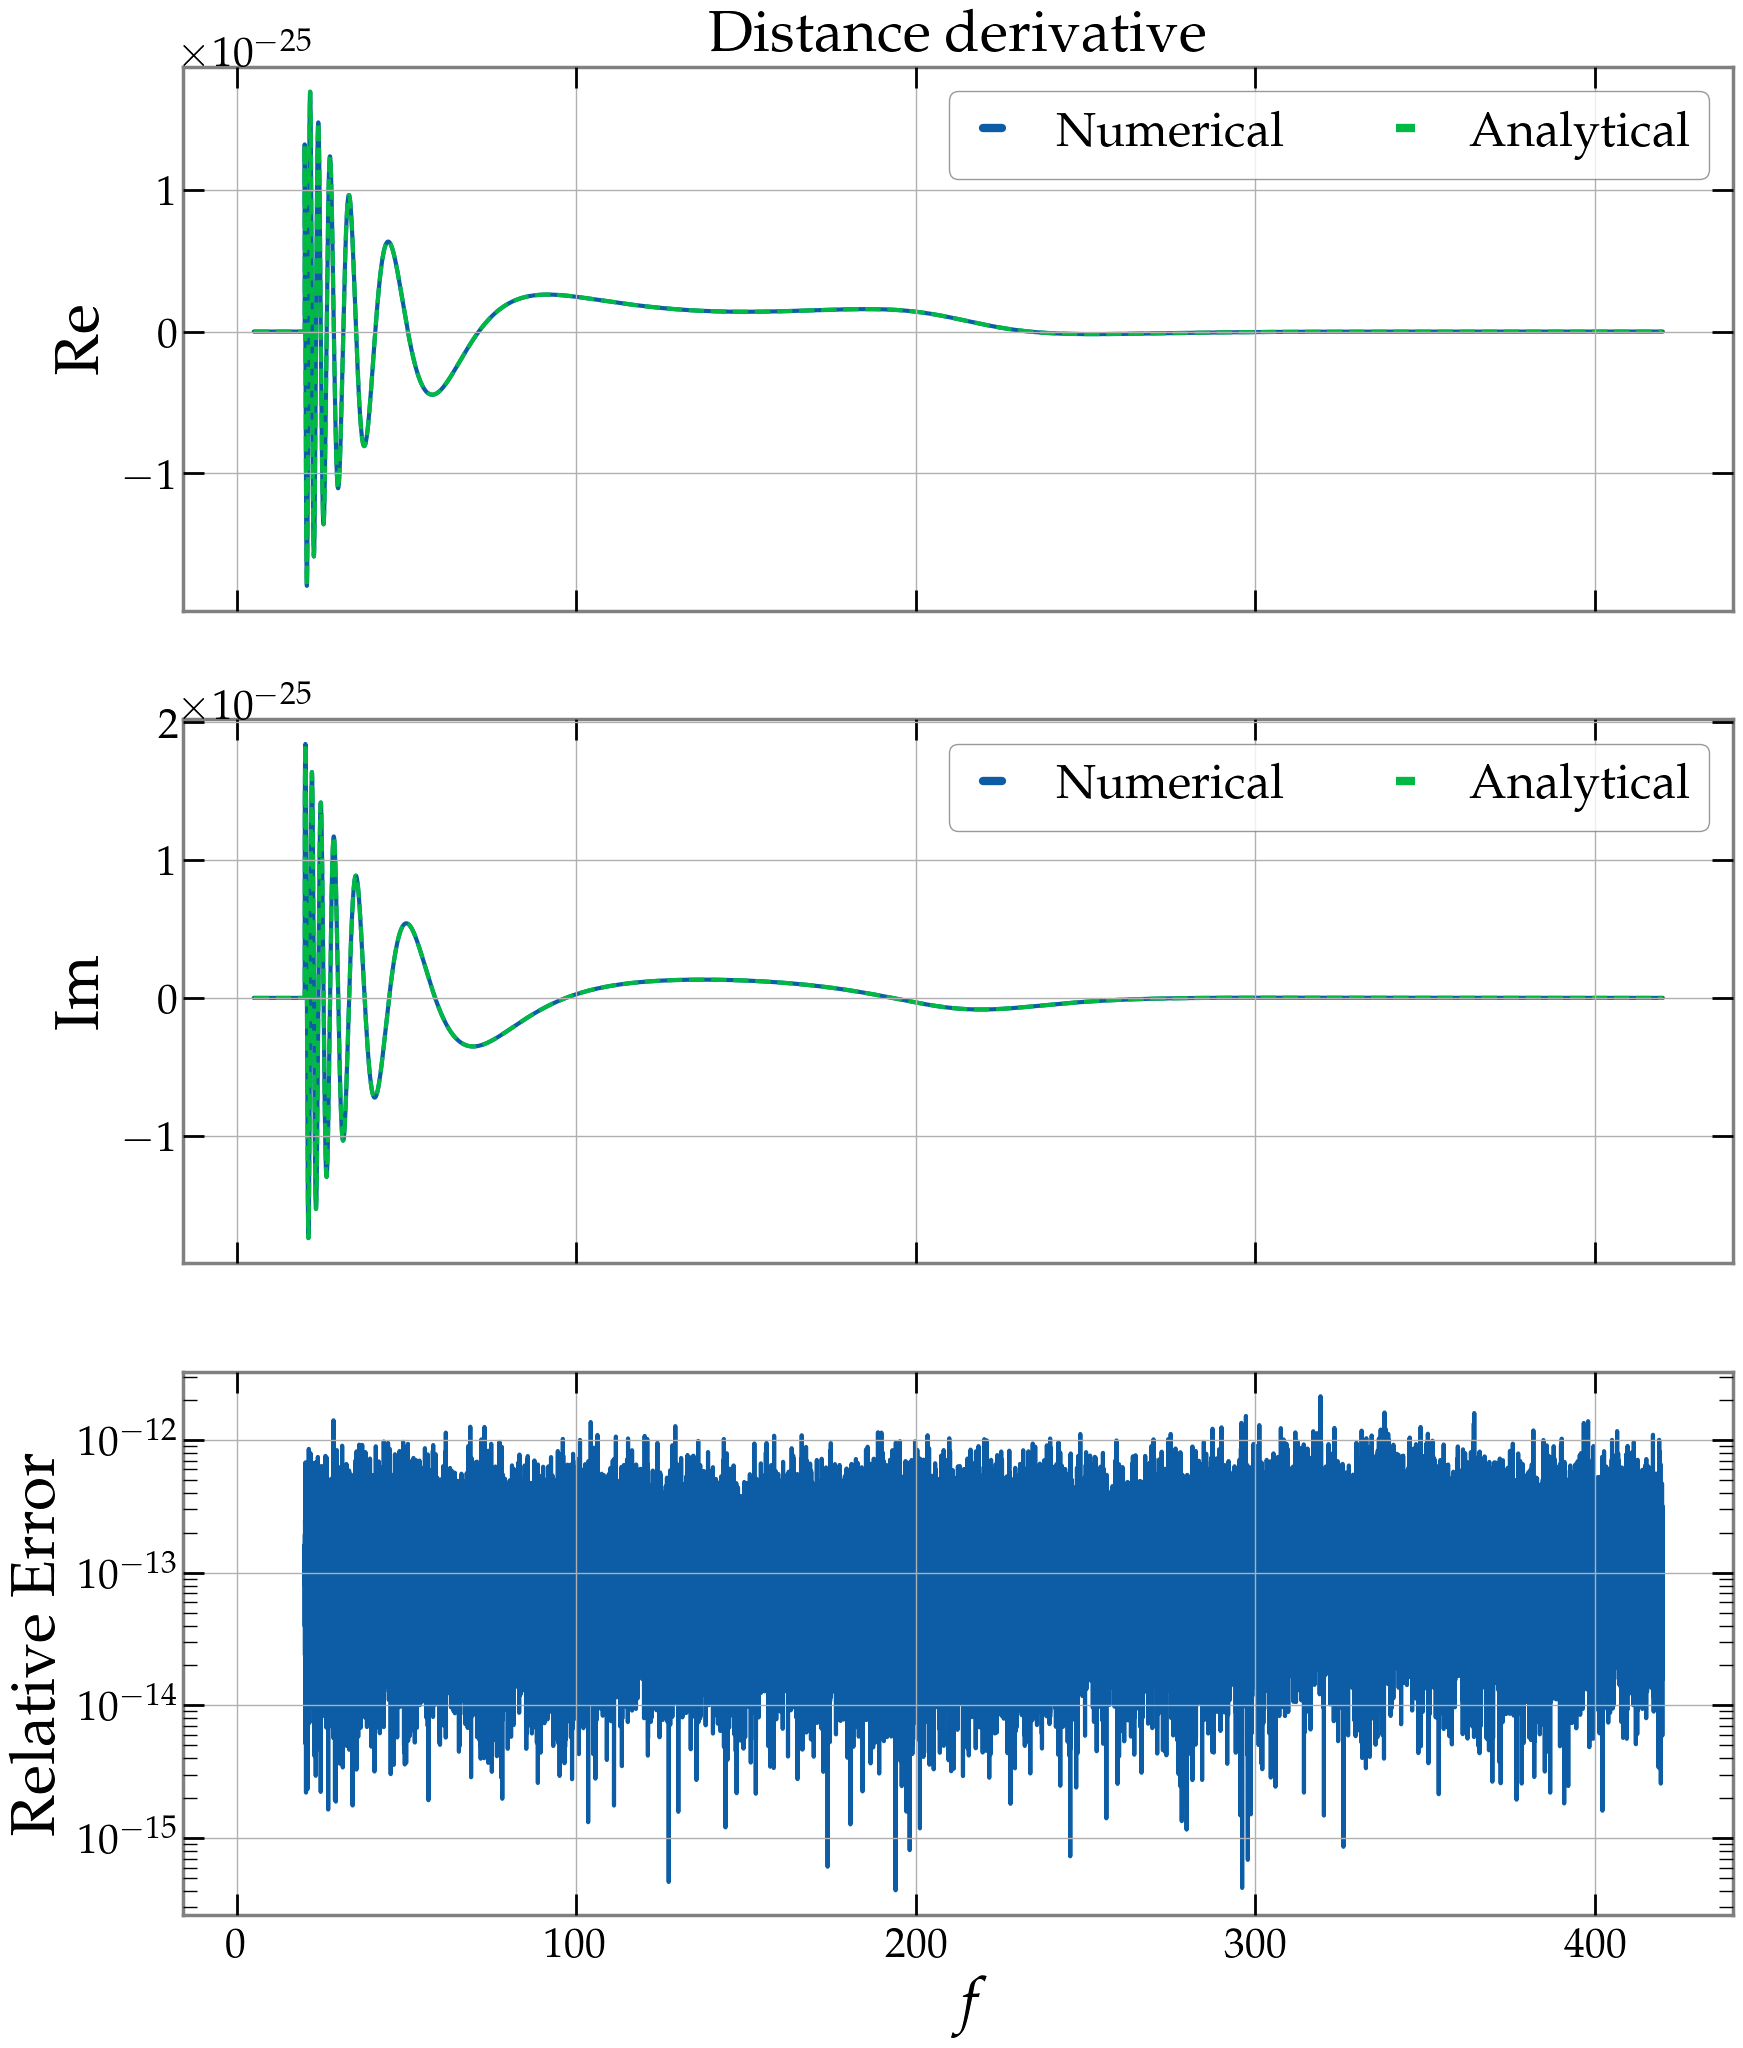

In [24]:
f_range = [5.0 * u.Hz, 420.0 * u.Hz]


fig, ax = plt.subplots(figsize=(20, 24), nrows=3, sharex=True)

ax[0].plot(
    num_deriv_distance.crop(start=f_range[0], end=f_range[1]).real, label='Numerical'
)
ax[0].plot(
    ana_deriv_distance.crop(start=f_range[0], end=f_range[1]).real,
    '--',
    label='Analytical',
)


ax[1].plot(
    num_deriv_distance.crop(start=f_range[0], end=f_range[1]).imag, label='Numerical'
)
ax[1].plot(
    ana_deriv_distance.crop(start=f_range[0], end=f_range[1]).imag,
    '--',
    label='Analytical',
)


ax[2].plot(
    ((ana_deriv_distance - num_deriv_distance) / ana_deriv_distance)
    .abs()
    .crop(start=f_range[0], end=f_range[1])
)


ax[0].set_title('Distance derivative')
ax[0].legend(ncols=2)
ax[1].legend(ncols=2)
ax[2].set_yscale('log')
plt.xlabel('$f$')
ax[0].set_ylabel('Re')
ax[1].set_ylabel('Im')
ax[2].set_ylabel('Relative Error')
# plt.xlim(5, 100)

plt.show()

Very good agreement

## Benchmarking

In [25]:
import cProfile

In [ ]:
cProfile.run(
    """deriv = WaveformDerivative(
        wf_params,
        param_to_vary,
        wf_generator,
        deriv_routine='gw_signal_tools',
        pass_inn_prod_kwargs_to_deriv=True,
    ).deriv""",
    sort=1,
)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is

         104069 function calls (103410 primitive calls) in 1.948 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       17    1.712    0.101    1.713    0.101 {built-in method lalsimulation._lalsimulation.SimInspiralGenerateFDWaveform}
      323    0.068    0.000    0.068    0.000 {built-in method lal._lal.DictInsertREAL8Value}
      732    0.014    0.000    0.014    0.000 {function Quantity.__array_ufunc__ at 0x121bc77e0}
       17    0.012    0.001    1.852    0.109 waveform.py:334(generate_fd_waveform)
       79    0.011    0.000    0.012    0.000 {function Series.copy at 0x130280540}
       35    0.011    0.000    0.014    0.000 numeric.py:2373(isclose)
        7    0.008    0.001    0.009    0.001 _quadrature.py:344(_basic_simpson)
       34    0.008    0.000    0.017    0.000 waveform.py:527(to_gwpy_Series)
       34    0.007    0.000    0.007    0.000 {built-in method lalsimulation._lalsimulation.SimInspiralImplement

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is

Main contributor is waveform generation, which is expected and also fine (cannot be avoided).

In [27]:
cProfile.run(
    """deriv = WaveformDerivative(
        wf_params,
        param_to_vary,
        wf_generator,
        deriv_routine='numdifftools'
    ).deriv""",
    sort=1,
)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is

         3264816 function calls (3264165 primitive calls) in 4.431 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       32    3.181    0.099    3.185    0.100 {built-in method lalsimulation._lalsimulation.SimInspiralGenerateFDWaveform}
        1    0.228    0.228    0.614    0.614 limits.py:144(_get_arg_min)
      608    0.123    0.000    0.123    0.000 {built-in method lal._lal.DictInsertREAL8Value}
   262145    0.118    0.000    0.368    0.000 numeric.py:680(flatnonzero)
        1    0.078    0.078    0.110    0.110 extrapolation.py:378(dea3)
   262177    0.065    0.000    0.104    0.000 fromnumeric.py:1904(ravel)
        4    0.049    0.012    0.049    0.012 {built-in method scipy.ndimage._nd_image.correlate1d}
        3    0.045    0.015    0.045    0.015 extrapolation.py:373(max_abs)
        2    0.043    0.021    0.043    0.021 {method 'partition' of 'numpy.ndarray' objects}
   262146    0.042    0.000    0.094    0

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is

In [28]:
cProfile.run(
    """deriv = WaveformDerivative(
        wf_params,
        param_to_vary,
        wf_generator,
        deriv_routine='amplitude_phase'
    ).deriv""",
    sort=1,
)

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is

         6514884 function calls (6513682 primitive calls) in 9.039 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       63    6.822    0.108    6.830    0.108 {built-in method lalsimulation._lalsimulation.SimInspiralGenerateFDWaveform}
        2    0.463    0.231    1.248    0.624 limits.py:144(_get_arg_min)
   524290    0.243    0.000    0.750    0.000 numeric.py:680(flatnonzero)
     1197    0.238    0.000    0.238    0.000 {built-in method lal._lal.DictInsertREAL8Value}
   524354    0.134    0.000    0.212    0.000 fromnumeric.py:1904(ravel)
   524292    0.086    0.000    0.188    0.000 fromnumeric.py:51(_wrapfunc)
   524290    0.073    0.000    0.252    0.000 fromnumeric.py:2018(nonzero)
        2    0.072    0.036    0.093    0.046 extrapolation.py:378(dea3)
   524290    0.071    0.000    0.071    0.000 {method 'nonzero' of 'numpy.ndarray' objects}
        4    0.053    0.013    0.053    0.013 {built-in method scipy.

XLAL Warning - XLALSimInspiralWaveformParamsLookupMass1 (LALSimInspiralWaveformParams.c:489): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMassRatio (LALSimInspiralWaveformParams.c:850): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupMass2 (LALSimInspiralWaveformParams.c:668): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralCheckDeterminationOfMasses (LALSimInspiralWaveformParams.c:87): This code is currently UNREVIEWED, use with caution!
XLAL Warning - XLALSimInspiralWaveformParamsLookupChirpMass (LALSimInspiralWaveformParams.c:886): This code is

We clearly difference in waveform calls, which causes difference in runtime. Is because we have to calculate amplitude and phase separately.